**Note**: Some of the code examples are digested from 

1. [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) 
2. [Github repo](https://github.com/deep-learning-with-pytorch/dlwpt-code) for "Deep Learning with PyTorch"

In [0]:
from __future__ import print_function
import torch
print(torch.__version__)

1.4.0


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Tensor Basics

### Initialization 

In [0]:
# Construct a 5x3 matrix, uninitialized
x = torch.empty(5, 3)
print(x)

tensor([[2.6049e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])


In [0]:
x.shape

torch.Size([5, 3])

In [0]:
a = torch.ones(3, dtype=torch.long)
a

tensor([1, 1, 1])

In [0]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [0]:
# Creating a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype
x = x.new_ones(5, 3, dtype=torch.double) # new_* methods take in sizes
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [0]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
x

tensor([[-2.4665, -0.8620,  0.6566],
        [-0.9680,  1.4343, -0.6784],
        [-1.2768,  0.3056, -1.1278],
        [ 0.9823,  0.5422,  0.0210],
        [ 1.4399,  0.9847, -0.6442]])

In [0]:
y = torch.rand(5, 3)

### Operations

In [0]:
x + y

tensor([[-1.5298, -0.7701,  1.5257],
        [-0.7622,  1.7915,  0.2324],
        [-0.5248,  0.9496, -0.9960],
        [ 1.1242,  1.0665,  0.4879],
        [ 2.2995,  1.5009,  0.2495]])

In [0]:
torch.add(x, y)

tensor([[-1.5298, -0.7701,  1.5257],
        [-0.7622,  1.7915,  0.2324],
        [-0.5248,  0.9496, -0.9960],
        [ 1.1242,  1.0665,  0.4879],
        [ 2.2995,  1.5009,  0.2495]])

In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[-1.5298, -0.7701,  1.5257],
        [-0.7622,  1.7915,  0.2324],
        [-0.5248,  0.9496, -0.9960],
        [ 1.1242,  1.0665,  0.4879],
        [ 2.2995,  1.5009,  0.2495]])

In [0]:
y.add_(x)
y

tensor([[-1.5298, -0.7701,  1.5257],
        [-0.7622,  1.7915,  0.2324],
        [-0.5248,  0.9496, -0.9960],
        [ 1.1242,  1.0665,  0.4879],
        [ 2.2995,  1.5009,  0.2495]])

### Numpy Interchangability

In [0]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [0]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [0]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### Storage and Views

In [0]:
points = torch.FloatTensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [0]:
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [0]:
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [0]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point.storage_offset()

2

In [0]:
second_point.size()

torch.Size([2])

In [0]:
second_point.shape

torch.Size([2])

In [0]:
# Stride is a tuple indicating the number of elements in the storage that have to be skipped when the index is increased by 1 in each dimension
points.stride()

(2, 1)

In [0]:
second_point.stride()

(1,)

In [0]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [0]:
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [0]:
id(points.storage()) == id(points_t.storage())

True

In [0]:
points.stride()

(2, 1)

In [0]:
points_t.stride()

(1, 2)

In [0]:
points.is_contiguous()

True

In [0]:
points_t.is_contiguous()

False

In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


### CUDA Tensors

In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 1.5287,  0.2327,  2.7245,  2.3729],
        [ 0.7942,  0.8341,  0.7933, -0.1406],
        [ 0.1751,  1.4483,  0.1329,  1.9678],
        [-0.5564,  0.6150,  1.3094, -0.5164]], device='cuda:0')
tensor([[ 1.5287,  0.2327,  2.7245,  2.3729],
        [ 0.7942,  0.8341,  0.7933, -0.1406],
        [ 0.1751,  1.4483,  0.1329,  1.9678],
        [-0.5564,  0.6150,  1.3094, -0.5164]], dtype=torch.float64)


# Autograd

In [0]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

False


In [0]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [0]:
b = (a * a).sum()
print(b.grad_fn)

### Example for scaler-valued function

In [0]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [0]:
y = x + 2
print(y)
print(y.grad_fn) # .grad_fn attribute that references a Function

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$$ out = \frac{1}{4} \sum_i 3(x_i + 2)^2 $$

In [0]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


$$ \frac{d(out)}{dx} = \frac{3}{2} (x_i + 2) $$

In [0]:
out.backward()  # same as out.backward(torch.tensor(1.))

In [0]:
x.grad # = d(out)/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

### Example of non-scalar-output function

NOTE: `torch.autograd` is an engine for computing vector-Jacobian product:

It means: if we have $\vec{y}=f(\vec{x})$, given any vector $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, it can compute the gradient of $l$ with respect of $\vec{x}$:

$$\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split} $$

In [0]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(x)
print(y)

tensor([ 2.2370, -0.3741,  0.2617], requires_grad=True)
tensor([1145.3496, -191.5556,  133.9785], grad_fn=<MulBackward0>)


In [0]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### Stop autograd if needed

In [0]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [0]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Neural Networks

Fahrenheit-Celsius Conversion Problem as illustration

## Data preparation

Assuming we collected the following data over the weeks:

*   `t_c`: known temperature in Celsius
*   `t_u`: 1 wall-mounted analog thermometer without unit

In [0]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

print('t_u as Numpy list:', t_u)

t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 
t_c = t_c.to(device)
t_u = t_u.to(device)

print("t_u after unsqueeze:\n", t_u)
t_u.shape

t_u as Numpy list: [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_u after unsqueeze:
 tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]], device='cuda:0')


torch.Size([11, 1])

In [0]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 4,  1,  5, 10,  7,  9,  8,  2,  6]), tensor([0, 3]))

In [0]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

## Using Neural Network model

In [0]:
import torch.nn as nn
dir(nn)

We use the simplest linear NN model with one hidden layer.
<img src="https://huqy.github.io/idre-learning-deep-learning-pytorch/nn_c2f.svg" alt="Linear NN model" style="width: 500px;"/>

In [0]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model.to(device)

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [0]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [0]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2733], device='cuda:0', requires_grad=True)

## Training

In [0]:
import torch.optim as optim
dir(optim)

In [0]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):

        t_p_train = model(t_u_train) 
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) 
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(loss_train), float(loss_val)))

In [0]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 141.8383331298828, Validation loss 391.21673583984375
Epoch 1000, Training loss 4.872678756713867, Validation loss 47.90406799316406
Epoch 2000, Training loss 3.5751283168792725, Validation loss 28.47532844543457
Epoch 3000, Training loss 2.8766727447509766, Validation loss 18.116960525512695
Epoch 4000, Training loss 3.833078622817993, Validation loss 11.266538619995117
Epoch 5000, Training loss 2.995079278945923, Validation loss 9.13658332824707
output tensor([[ 1.6577],
        [23.1670]], device='cuda:0', grad_fn=<AddmmBackward>)
answer tensor([[ 0.5000],
        [28.0000]], device='cuda:0')
hidden tensor([[ -0.1576],
        [  0.8058],
        [-26.5278],
        [-24.1316],
        [ -0.2795],
        [ 25.6697],
        [ 26.6822],
        [  1.1383]], device='cuda:0')


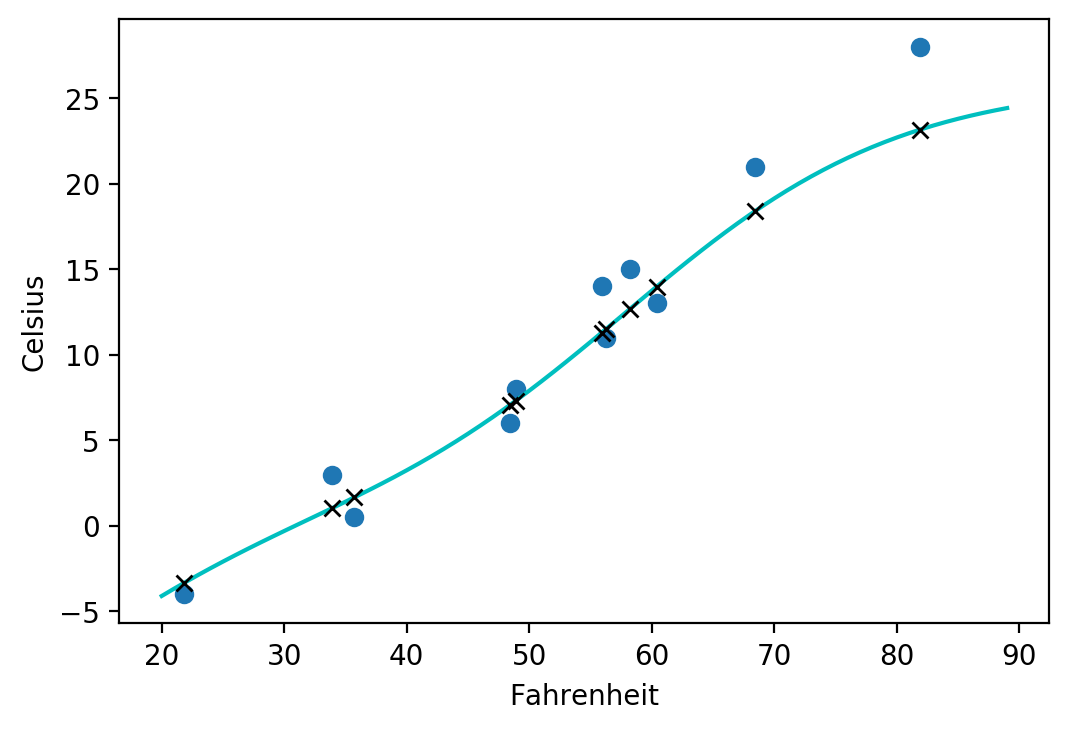

In [0]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
t_range = t_range.to(device)

fig = plt.figure(dpi=200)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.cpu().numpy(), t_c.cpu().numpy(), 'o')
plt.plot(t_range.cpu().numpy(), seq_model(0.1 * t_range).detach().cpu().numpy(), 'c-')
plt.plot(t_u.cpu().numpy(), seq_model(0.1 * t_u).detach().cpu().numpy(), 'kx')